In [1]:
from src.eeg_data_utils import EegDataProcessor
from src.audio_data_utils import  AudioDataProcessor

In [2]:
filepathEeg = '/home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf'
filepathAudio = '/home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/sub-MartaGomezCarmona_ses-VCV_Ses01_task-Default_run-001_eeg.xdf'

In [3]:
eegData = EegDataProcessor(filepathEeg)
#audioData = AudioData(filepathAudio)

*******************Loading /home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf File*******************
Extracting EDF parameters from /home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3055871  =      0.000 ...  5968.498 secs...
*******************Loaded /home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf File*******************
****************Normalizing Triggers********************
****************Correcting Triggers********************
**************** Calculating EEG Transition Indexes********************


In [4]:
eegData.eegEvents[:5]

[['StartBlockSaying', 'Saying', 1656410777.0546875, 4636, 1007],
 ['StartReading', 'Saying', 1656410779.0214844, 5643, 769],
 ['ITI', 'Saying', 1656410780.5234375, 6412, 795],
 ['StartSaying', 'Saying', 1656410782.0761719, 7207, 769],
 ['Fixation', 'Saying', 1656410783.578125, 7976, 817]]

In [5]:
eegData.triggers.shape

(3055872,)

In [6]:
from matplotlib import pyplot as plt

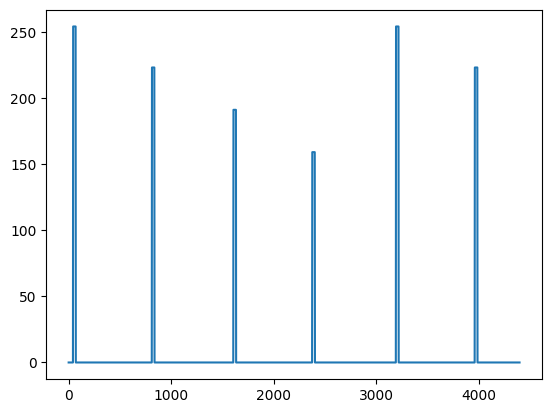

In [7]:
plt.plot(eegData.triggersNormalized[5600:10000])

In [8]:
eegData.eegEvents[110:120]

[['Fixation', 'Saying', 1656411207.6855469, 225119, 942],
 ['StartReading', 'Saying', 1656411209.5253906, 226061, 768],
 ['ITI', 'Saying', 1656411211.0253906, 226829, 803],
 ['StartSaying', 'Saying', 1656411212.59375, 227632, 769],
 ['Fixation', 'Saying', 1656411214.0957031, 228401, 871],
 ['StartReading', 'Saying', 1656411215.796875, 229272, 769],
 ['ITI', 'Saying', 1656411217.2988281, 230041, 832],
 ['StartSaying', 'Saying', 1656411218.9238281, 230873, 767],
 ['Fixation', 'Saying', 1656411220.421875, 231640, 1004],
 ['StartReading', 'Saying', 1656411222.3828125, 232644, 769]]

In [9]:
audioData = AudioDataProcessor(filepathAudio)

*********************************************************************************
***************************Loading .xdf file***************************
*******************************Completed*******************************
***************************Loading Audio data***************************


In [10]:
for marker in audioData.markers:
    marker = marker[0]
    print(marker)
    break

ExperimentStarted


In [11]:
audioData.markersTimeStamps[0]

1656411161.8758757

In [12]:
markerTimestamps = audioData.rawData[0][0]['time_stamps']
audioTimestamps = audioData.rawData[0][1]['time_stamps']

In [13]:
import numpy as np
markerTimestamps.shape, audioTimestamps.shape

((1720,), (139444200,))

In [18]:
nearest_indices = []
index = 0
for index in range(markerTimestamps.shape[0]):
    marker = markerTimestamps[index]
    differences = np.abs(audioTimestamps - marker)
    # Find the index of the smallest difference
    nearest_index = np.argmin(differences)
    print(marker, audioData.markers[index], nearest_index, audioTimestamps[nearest_index])
    # Append the index to the list
    nearest_indices.append(nearest_index)
    if index == 10:
        break
    index +=1

print(nearest_indices)

1656403961.8758757 ['ExperimentStarted'] 1647646 1656403961.8758688
1656403961.8760812 ['StartBlockSaying'] 1647655 1656403961.876073
1656403963.5009775 ['StartReading:UKU'] 1719314 1656403963.5009758
1656403965.0040228 ['EndReading:UKU'] 1785599 1656403965.0040205
1656403966.7929919 ['StartSaying:UKU'] 1864494 1656403966.793003
1656403968.2955227 ['EndSaying:UKU'] 1930756 1656403968.2955263
1656403970.3091805 ['StartReading:IFI'] 2019559 1656403970.3091776
1656403971.8108356 ['EndReading:IFI'] 2085783 1656403971.8108392
1656403973.7580252 ['StartSaying:IFI'] 2171655 1656403973.7580287
1656403975.260638 ['EndSaying:IFI'] 2237921 1656403975.2606428
1656403977.2499244 ['StartReading:AFA'] 2325649 1656403977.249918
[1647646, 1647655, 1719314, 1785599, 1864494, 1930756, 2019559, 2085783, 2171655, 2237921, 2325649]
